In [1]:
#The central limit theorem is useful when analyzing large data sets because it allows one to assume that the sampling distribution of the mean will be normally-distributed in most cases.
#This allows for easier statistical analysis and inference.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st #for sample_standard deviation bcz sample_std has different formula than np.std(). this is for population std

In [131]:
#null hypothesis:
#it is a claim or statement or assumption about population parameters that is assumed to be true but it may or may not true actually
#(H0)
#preassume-that there is no significant diff in pop parameter and sample statistics

In [132]:
#alternate hypothesis:
#it is complement of null hypothesis
#(H1) or Ha

In [133]:
#Example:
#null hypothesis:maggi manufacturer says it contains <=2.5ppm of lead
#alternate hypothesis:govt says it contains more lead than what they say

In [134]:
#Z-test
#if sample size >=30 and
#pop mean and std is known then we can apply ztest
#z-statistics=(s_mean-pop_mean)/standard error
#standard error=pop_sd/sqrt(sample size)

#if u cant find pop_std
#sample_std/sqrt(N)

In [3]:
(63+54)/2

58.5

In [ ]:
##### Possible outcomes:reject H0,do not reject H0

In [136]:
#Level of significance (alpha)
#if we want to reject or accept null hypothesis , we have to set level of significance
#lOS will tell probability of error in accepting or rejecting null hypothesis
#it is the level of risk associated in rejecting the correct hypothesis
#we can take 5 % as default

In [137]:
#level of confidence
#1-los

In [138]:
#type of test:
#two tailed test- when H1 != number
#one tailed test-(right tailed and left tailed):H1>number or H1<number


# Right tailed test

In [139]:
#H0<=?
#H1>?

In [140]:
#Right tailed test
#demo:Farm size hypothesis test in concept resources

In [141]:
#1 Z test

In [142]:
df=pd.read_csv("DS1_C5_S6_Hypothesis_I_Concept_FarmSize_Data.csv")

In [143]:
df

,State,2018_Number_of_farms,2019_Number_of_farms,"2018_Land_in_farms(in1,000acres)","2019_Land_in_farms(in1,000acres)",2018_Average_farm_size(acres),2019_Average_farm_size(acres)
0,Alabama,39700,38800,8500,8300,214,214
1,Alaska,1000,1050,850,850,850,810
2,Arizona,19200,19000,26200,26200,1365,1379
3,Arkansas,42500,42300,13900,14000,327,331
4,California,69400,69900,24300,24300,350,348
5,Colorado,38900,38700,31800,31800,817,822
6,Connecticut,5500,5500,380,380,69,69
7,Delaware,2300,2300,530,530,230,230
8,Florida,47500,47400,9700,9700,204,205
9,Georgia,41600,41500,10100,10200,243,246


In [144]:
df.columns


Index(['State', '2018_Number_of_farms', '2019_Number_of_farms',
       '2018_Land_in_farms(in1,000acres)', '2019_Land_in_farms(in1,000acres)',
       ' 2018_Average_farm_size(acres)', ' 2019_Average_farm_size(acres)'],
      dtype='object')

In [145]:
#lets remove extra left space from column names

In [146]:
df.columns=df.columns.map(lambda x:x.lstrip())

In [147]:
df.columns

Index(['State', '2018_Number_of_farms', '2019_Number_of_farms',
       '2018_Land_in_farms(in1,000acres)', '2019_Land_in_farms(in1,000acres)',
       '2018_Average_farm_size(acres)', '2019_Average_farm_size(acres)'],
      dtype='object')

In [148]:
#pop mean and std
mu=df["2018_Average_farm_size(acres)"].mean()
sigma=df["2018_Average_farm_size(acres)"].std()
mu,sigma

(442.6, 462.4969939229391)

In [149]:
#sample
s=df.sample(35,random_state=1)

In [150]:
x_bar=s["2019_Average_farm_size(acres)"].mean()
x_bar

421.4

In [151]:
n=35#sample size
alpha=0.05#level of significance
z_s=(x_bar-mu)/(sigma/np.sqrt(n))
z_s#z statistics

-0.27118206831547464

In [152]:
pvalue=stat.norm.cdf(z_s)
pvalue

0.3931255019163199

In [153]:
pos_z_critical=stat.norm.ppf(1-alpha)#right tailed test
pos_z_critical

1.6448536269514722

In [154]:
if z_s<pos_z_critical and pvalue>alpha:
    print("Accept null hypothesis.no significant difference")
else:
    print("Reject null hypothesis.there is significant diff")

Accept null hypothesis.no significant difference


In [155]:
#Ho is rejected when H0 is true-Type1 error
#Ho is accepted when H0 is false-Type2 error

# Left tailed test

In [156]:
#H0>=?
#H1<?

In [157]:
sample_ratings=np.array([3,4,5,5,4,5,5,4,4,4,4,4,4,4,4,5,4,4,4,3,4,4,4,3,5,4,4,5,4,4,4,5])

In [158]:
s_mean=np.mean(sample_ratings)
s_mean

4.15625

In [159]:
n=len(sample_ratings)
n

32

In [160]:
#given data
pop_mean=4.3
pop_sd=0.574
alpha=0.1

In [161]:
z_s=(s_mean-pop_mean)/(pop_sd/np.sqrt(n))
z_s

-1.4166773490671232

In [162]:
pvalue=stat.norm.cdf(z_s)
pvalue

0.07828864121333116

In [163]:
neg_z_critical=stat.norm.ppf(alpha)
neg_z_critical

-1.2815515655446004

In [164]:
if z_s>neg_z_critical and pvalue>alpha:
    print("Accept")
else:
    print("Reject")

Reject


# Two tailed Test

In [165]:
#H0=?
#H1!=?

In [166]:
df=pd.read_csv("DS1_C5_S6_Hypothesis_I_Concept_Wages_Data.csv")
df

,Advertising Manager,Sales Manager
0,74.256,71.492
1,96.234,67.814
2,89.807,56.470
3,93.261,72.401
4,103.030,71.804
5,74.195,46.394
6,75.932,54.449
7,80.742,59.676
8,39.672,63.369
9,45.652,43.649


In [167]:
#H0:mu1=mu2:mu1-mu2=0
#H1:mu1-mu2!=0

In [168]:
#z_s for 2sample mean have different formula

In [169]:
#sample1 :advertising manager

In [170]:
s1_mean=df["Advertising Manager"].mean()
n1=len(df["Advertising Manager"][:33])#bcz of null values
s1_var=df["Advertising Manager"].var()
s1_mean,n1,s1_var

(70.27830303030304, 33, 261.780452967803)

In [171]:
#sample2: Sales manager

In [172]:
s2_mean=df["Sales Manager"].mean()
n2=len(df["Sales Manager"])
s2_var=df["Sales Manager"].var()
s2_mean,n2,s2_var

(61.52468571428572, 35, 176.8490783983193)

In [173]:
alpha=0.05#given as 5%

In [174]:
#z_s :z statistics of 2 sample mean
z_s=(s1_mean-s2_mean)/(np.sqrt((s1_var/n1)+(s2_var/n2)))
z_s

2.429165013110487

In [175]:
pvalue=1-stat.norm.cdf(z_s)#since z_s is positive
pvalue=pvalue*2#multiply by 2
pvalue

0.015133642738636155

In [176]:
neg_z_critical=stat.norm.ppf(alpha/2)
pos_z_critical=stat.norm.ppf(1-alpha/2)
neg_z_critical,pos_z_critical

(-1.9599639845400545, 1.959963984540054)

In [177]:
if neg_z_critical<z_s<pos_z_critical and pvalue>alpha:
    print("accept")
else:
    print("reject.there is significant difference")

reject.there is significant difference


# T test

### if population standard deivation is unknown then we can use t-test.
### if even pop sd is known and sample size is less than 30 we can use this t-test

### for z-test:saample size>30 &pop_sd is known

### for both population should be normally distributed

In [178]:
#t distribution is symmetrical around its mean
#values range btw -infinity to +infinity

In [179]:
#Degree of Freedom: refers to the maximum number of logically independent value that have freedom to vary
#df=n-1

In [180]:
#sample of 4 numbers={3,8,5,4} and if mean of 5 numbers is 6, then 5th no should be 10
#so here 10 has no freedom to vary. df=n-1=5-1=4

#### 1 sample t test 

In [181]:
#t stat for 1 sample mean=(s_mean-pop_mean)/standard error
#standard error=s_sd/sqrt(n)

In [182]:
#demo

In [183]:
pop_mean=1272
alpha=0.05

In [184]:
s=np.array([1208,812,1217,1323,1308,1515,831,1021,1387,951,930,730])

In [185]:
#sample standard deviation have slighly different formula .replace n with n-1 in formula for sample std.
#so use statistics.stdev()

In [186]:
s_mean=s.mean()
s_sd=st.stdev(s)
n=len(s)
s_mean,s_sd,n


(1102.75, 256.2654873368632, 12)

In [187]:
t_statistic=(s_mean-pop_mean)/(s_sd/np.sqrt(n))
t_statistic

-2.2878585971718057

In [188]:
dof=n-1#degree of freedom
dof

11

In [189]:
neg_t_critical=stat.t.ppf(alpha/2,dof)#alpha/2 bcz of 2tail test
pos_t_critical=stat.t.ppf(1-alpha/2,dof)
neg_t_critical,pos_t_critical

(-2.200985160082949, 2.200985160082949)

In [190]:
pvalue=stat.t.cdf(t_statistic,dof)
pvalue=pvalue*2#2tail
pvalue

0.04293902318131083

In [191]:
if neg_t_critical<t_statistic<pos_t_critical and pvalue>alpha:
    print("accept")
else:
    print("reject null hypothesis. there is significant diff in dental care expenditure")

reject null hypothesis. there is significant diff in dental care expenditure


In [192]:
#u can also use this function in statistics library to get t stat and pvalue
stat.ttest_1samp(s,pop_mean)

Ttest_1sampResult(statistic=-2.2878518671996195, pvalue=0.04293953117010542)

#### for 2tail t-test:
#### stat.ttest_1samp(s,pop_mean)
#### for right tail t-test:
#### stat.ttest_1samp(s,pop_mean,alternative="greater")
#### for left tail t-test:
#### stat.ttest_1samp(s,pop_mean,alternative="lesser")

In [193]:
def my_ttest_1sample(s,pop_mean,alpha):
    s_mean=s.mean()
    s_sd=st.stdev(s)
    n=len(s)
    t_statistic=(s_mean-pop_mean)/(s_sd/np.sqrt(n))
    dof=n-1
    neg_t_critical=stat.t.ppf(alpha/2,dof)
    pos_t_critical=stat.t.ppf(1-alpha/2,dof)
    pvalue=stat.t.cdf(t_statistic,dof)*2
    return t_statistic,neg_t_critical,pos_t_critical,pvalue
test=my_ttest_1sample(s,pop_mean,0.05)
print('t_statistic:',test[0],'neg_t_critical:',test[1],'pos_t_critical:',test[2],'pvalue:',test[3])

t_statistic: -2.2878585971718057 neg_t_critical: -2.200985160082949 pos_t_critical: 2.200985160082949 pvalue: 0.04293902318131083


#### 2 sample T test

In [194]:
#assumption for 2 sample t test:population variance are approxiamaltey equal

In [195]:
#t_statistic formula is different

In [196]:
It=np.array([4,5,6,4,4,3,2,5,3,4,7])
Finance=np.array([2,3,4,5,4,7,6,4,3])

In [197]:
s1_mean=It.mean()
s2_mean=Finance.mean()
v1=st.variance(It)#from statistics library
v2=st.variance(Finance)
n1=len(It)
n2=len(Finance)
df1=n1-1
df2=n2-1
df=df1+df2
s1_mean,s2_mean,v1,v2,n1,n2

(4.2727272727272725, 4.222222222222222, 2, 2, 11, 9)

In [198]:
#t-statistic
a=s1_mean-s2_mean
b=np.sqrt(((df1*v1)+(df2*v2))/df)
c=np.sqrt((1/n1)+(1/n2))
t_statistic=a/(b*c)
t_statistic

0.07945521577046549

In [199]:
alpha=0.05
neg_t_critical=stat.t.ppf(alpha/2,df)
pos_t_critical=stat.t.ppf(1-alpha/2,df)
neg_t_critical,pos_t_critical

(-2.10092204024096, 2.10092204024096)

In [200]:
pvalue=(1-stat.t.cdf(t_statistic,df))*2
pvalue

0.937547243022204

In [201]:
# or using library for 2 sample t test:
stat.ttest_ind(It,Finance)

Ttest_indResult(statistic=0.07562651385838887, pvalue=0.9405504456951822)

In [203]:
if neg_t_critical<t_statistic<pos_t_critical and pvalue>alpha:
    print("accept. there is no sig diff")
else:
    print("reject")

accept. there is no sig diff


In [ ]:
#t-distribution curve
#for each degree of freedom there is new t distribution curve

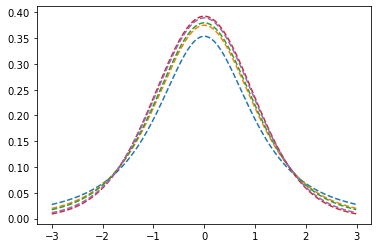

In [240]:
x=np.arange(-3,3,0.01)
two_df=stat.t.pdf(x,2)#two degree of freedom
four_df=stat.t.pdf(x,4)
five_df=stat.t.pdf(x,5)
ten_df=stat.t.pdf(x,10)
fifteen_df=stat.t.pdf(x,15)
plt.plot(x,two_df,x,four_df,x,five_df,x,fifteen_df,x,ten_df,linestyle="dashed")
plt.show()

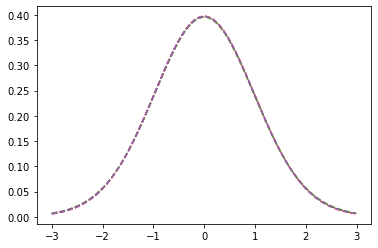

In [242]:
x=np.arange(-3,3,0.01)
two_df=stat.t.pdf(x,30)
four_df=stat.t.pdf(x,32)
five_df=stat.t.pdf(x,35)
ten_df=stat.t.pdf(x,50)
fifteen_df=stat.t.pdf(x,60)
plt.plot(x,two_df,x,four_df,x,five_df,x,fifteen_df,x,ten_df,linestyle="dashed")
plt.show()

# Anova test

In [ ]:
#analysis of variance
#used for comparing sample means/variances taken from different populations
#anova is always right tailed test

In [ ]:
#H0:mean1=mean2=mean3
#H1:atleast one mean is different

In [205]:
s1=[30,27,27,28,29,28]
s2=[31,34,30,33,32,32]
s3=[24,24,25,25,26,26]
alpha=0.01

In [206]:
dfc=3-1#degree of freedom for rows .3columns so 3-1
dfr=(6-1)+(6-1)+(6-1)
#dft=18-1#total-1

In [208]:
f_critical=stat.f.ppf(1-alpha,dfc,dfr)
f_critical

6.358873480667171

In [210]:
f_statistic,pvalue=stat.f_oneway(s1,s2,s3)
f_statistic,pvalue

(53.08000000000004, 1.5685196289333733e-07)

In [212]:
if f_statistic<f_critical and pvalue>alpha:
    print("accept")
else:
    print("reject")

reject


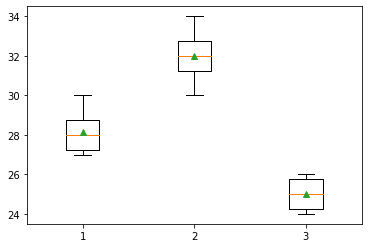

In [224]:
plt.boxplot([s1,s2,s3],vert=True,showmeans=True)
plt.show()

In [ ]:
#T distribution have higher kurtosis than normal distribution

# Chi square test

In [ ]:
# It is applied when you have two categorical variables from a single population.
#it is used to determine whether significant association between two variables

In [2]:
import seaborn as sns

In [4]:
dataset=sns.load_dataset("tips")

In [6]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#lets find whether there is association btw sex and smoker

In [8]:
ct=pd.crosstab(dataset["sex"],dataset["smoker"])
ct

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [9]:
#we get observed values on crosstab o
#then we calculate expected values  e
stat.chi2_contingency(ct)

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [ ]:
#then find chi-square statistic value using formula which needs both observed and expected values
#summation(sqr(o-e)/e)
#find critical value stats.chi2.ppf
#same as other tests

In [ ]:
#A confidence interval shows the probability that a parameter will fall between a pair of values around the mean